# Functions and Mapping

In [ ]:
import numpy as np
import pandas as pd

In [32]:
values = np.random.randn(4,3)
cols = list('bde')
frame = pd.DataFrame(values, columns=cols)
frame
# we can force all values ot be positive with 'abs'
frame = np.abs(frame)
frame

,b,d,e
0,0.651796,0.156679,0.607470
1,0.107305,0.121260,0.168799
2,1.500812,0.212000,0.533412
3,0.994979,0.143402,0.579549


## we can apply a function to every member of our data frame

In [36]:
fn = lambda x:x.max()-x.min() # the difference between max and min
frame.apply(fn, axis='columns') # same as axis=1


0    0.495117
1    0.061494
2    1.288813
3    0.851577
dtype: float64

In [41]:
def fnB(x): # this argument x will be used in the fn
    facets = [x.min(), x.max()]
    idx = ['min','max']
    return pd.Series(facets, index=idx)
res = frame.apply(fnB)
res

,b,d,e
min,0.107305,0.12126,0.168799
max,1.500812,0.21200,0.607470


## Plotting Results

Text(0.5, 1.0, 'the normal distribution viewed from above')

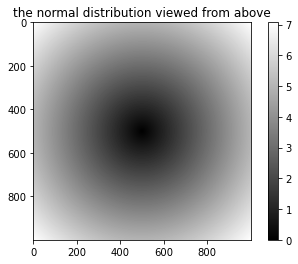

In [50]:
import matplotlib.pyplot as plt
points  = np.arange(-5, 5, .01) # 1000 equallty spaced numbers
points
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2) # hypotenuse
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title('the normal distribution viewed from above')

## Mapping Function to data

In [53]:
format = lambda x: '%.2f' %x
frame.applymap(format) # good idea to only collapse the accuracy when outputting
frame['e'].map(format) # map just the column 'e'

0    0.61
1    0.17
2    0.53
3    0.58
Name: e, dtype: object

## Sorting and Ranking Data

In [56]:
o = pd.Series(range(4), index=['d','a','b','c'])
o.sort_index()
# o.sort_values()

d    0
a    1
b    2
c    3
dtype: int64

In [64]:
data = np.arange(8).reshape( (2,4) )
i = ['three', 'one']
c = ['d', 'a', 'b', 'c']
frame = pd.DataFrame(data, index=i, columns=c)
frame.sort_index(axis=1, ascending=False)
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [66]:
frame.sort_values(by=['b', 'a'], ascending=False)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


## Ranking the frequency of values

In [69]:
o = pd.Series([7, -5, 7, 4, 2, 0, 4, 4])
print(o)
o.rank() # rank the order of values, accounting for frequency

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
7    4
dtype: int64


0    7.5
1    1.0
2    7.5
3    5.0
4    3.0
5    2.0
6    5.0
7    5.0
dtype: float64